In [395]:
### Lending Club Case Study Analysis

In [396]:
### Import Libraries
import pandas as pd
import numpy as np

#Import Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


In [397]:
#Load the dataset
masterdf = pd.read_csv("loan.csv", skipinitialspace=True)
masterdf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [398]:
masterdf.shape

(39717, 111)

In [399]:
masterdf.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [400]:
#Check the number of null values in the columns
masterdf.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [401]:
#### Check the null values per Column in Percentage so we can see to drop few columns having more null values.s
clean_null = round(100*(masterdf.isnull().sum()/len(masterdf.index)), 2)

clean_null.sort_values(ascending = False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [402]:
### Drop Null Values columns having  > 90% null values in them.
masterdf.drop(clean_null[ clean_null > 90 ].index, axis=1, inplace=True)


In [403]:
### Check for the null values % after dropping columns > 90% of snull valuess
clean_null = round(100*(masterdf.isnull().sum()/len(masterdf.index)), 2)
## Sort them in descending order
clean_null.sort_values(ascending = False)

mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_acc                      0.00
total_pymnt_inv                0.00
recoveries                     0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
pub_rec                        0.00
collection_recovery_fee        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq              

In [404]:
### Check for the reduced size of columnss
masterdf.shape

(39717, 55)

In [405]:
# Look for Unique values in the columns. For example a column containing all zero values is of no use for analysis.
masterdf.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

In [406]:
#Dropping Columns with one Unique values. No use for analysis.
masterdf.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type',
 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [407]:
### Check for size to confirm on the columns dropped. 
masterdf.shape

(39717, 46)

In [408]:
#Finding number of unique values, printing high unique valued columns
masterdf.nunique().sort_values(ascending=False).head(12)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
desc               26527
revol_bal          21711
title              19615
installment        15383
dtype: int64

In [409]:
masterdf.drop(['emp_title', 'title','member_id', 'url', 'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee',
'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv','mths_since_last_delinq'], axis=1, inplace=True)



In [410]:
### Check for the null values % after dropping columns > 90% of snull valuess
clean_null = round(100*(masterdf.isnull().sum()/len(masterdf.index)), 2)
## Sort them in descending order
clean_null.sort_values(ascending = False)

desc                    32.58
emp_length               2.71
pub_rec_bankruptcies     1.75
revol_util               0.13
dti                      0.00
delinq_2yrs              0.00
earliest_cr_line         0.00
inq_last_6mths           0.00
open_acc                 0.00
pub_rec                  0.00
zip_code                 0.00
revol_bal                0.00
total_acc                0.00
total_pymnt              0.00
total_pymnt_inv          0.00
last_pymnt_amnt          0.00
addr_state               0.00
id                       0.00
loan_amnt                0.00
loan_status              0.00
issue_d                  0.00
verification_status      0.00
annual_inc               0.00
home_ownership           0.00
sub_grade                0.00
grade                    0.00
installment              0.00
int_rate                 0.00
term                     0.00
funded_amnt_inv          0.00
funded_amnt              0.00
purpose                  0.00
dtype: float64

In [411]:
masterdf.shape

(39717, 32)

In [412]:

masterdf.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

masterdf.drop(['desc'], axis=1, inplace=True)

In [413]:
### Check for the null values % after dropping columns > 90% of snull valuess
clean_null = round(100*(masterdf.isnull().sum()/len(masterdf.index)), 2)
## Sort them in descending order
clean_null.sort_values(ascending = False)

id                      0.0
zip_code                0.0
last_pymnt_amnt         0.0
total_pymnt_inv         0.0
total_pymnt             0.0
total_acc               0.0
revol_util              0.0
revol_bal               0.0
pub_rec                 0.0
open_acc                0.0
inq_last_6mths          0.0
earliest_cr_line        0.0
delinq_2yrs             0.0
dti                     0.0
addr_state              0.0
purpose                 0.0
loan_amnt               0.0
loan_status             0.0
issue_d                 0.0
verification_status     0.0
annual_inc              0.0
home_ownership          0.0
emp_length              0.0
sub_grade               0.0
grade                   0.0
installment             0.0
int_rate                0.0
term                    0.0
funded_amnt_inv         0.0
funded_amnt             0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [414]:
masterdf.shape

(37898, 31)

In [415]:
#Checking unique values for term column
masterdf.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [416]:
#Stripping empty space in values in term
masterdf['term'] = masterdf.term.str.strip()
masterdf.term.unique()

array(['36 months', '60 months'], dtype=object)

In [417]:

#Removing current loan status rows
masterdf = masterdf[masterdf.loan_status != 'Current']

In [418]:
masterdf.shape

(36800, 31)

In [419]:
#stripping '%' value
masterdf['int_rate'] = masterdf.int_rate.str.strip('%').astype(float)
masterdf['revol_util'] = masterdf.revol_util.str.strip('%').astype(float)

#converting to date type
masterdf['issue_d'] = pd.to_datetime(masterdf.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
masterdf['issue_d'] = masterdf['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [420]:
# Converted to proper datatypes for analysis
masterdf.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line                object
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

In [421]:
#issue_d column
masterdf['issue_d_year'] = masterdf.issue_d.dt.year
masterdf['issue_d_month'] = masterdf.issue_d.dt.strftime('%b')
masterdf['issue_d_weekday'] = masterdf.issue_d.dt.weekday
#data type conversion of year and weekday
masterdf['issue_d_year'] = masterdf['issue_d_year'].astype(object)
masterdf['issue_d_weekday'] = masterdf['issue_d_weekday'].astype(object)


In [422]:
#### Analysis 

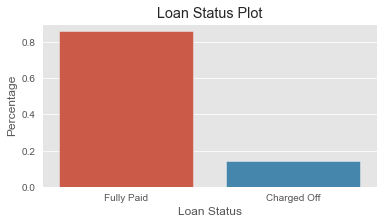

In [423]:
plt.style.use("ggplot")
plt.figure(figsize=(6,3))

### Percentage for Y axis
percent_df = masterdf['loan_status'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='loan_status', data=percent_df)
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.title('Loan Status Plot')
plt.show()

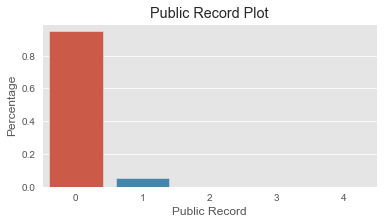

In [424]:
plt.figure(figsize=(6,3))

### Percentage for Y axis
percent_df = masterdf['pub_rec'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='pub_rec', data=percent_df)
plt.xlabel('Public Record')
plt.ylabel('Percentage')
plt.title('Public Record Plot')
plt.show()

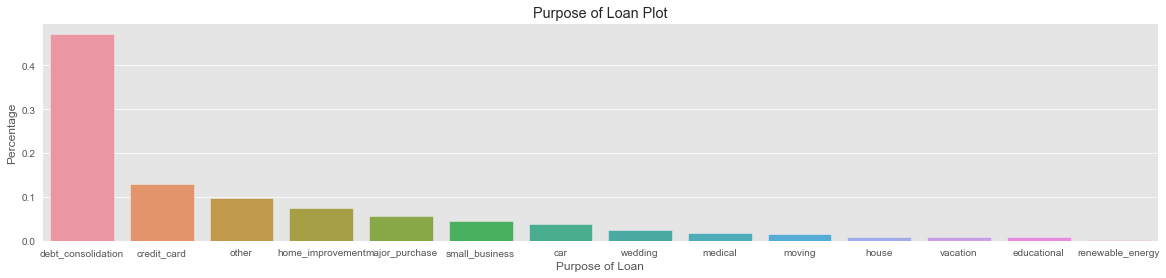

In [425]:
plt.figure(figsize=(20,4))

### Percentage for Y axis
percent_df = masterdf['purpose'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='purpose', data=percent_df)
plt.xlabel('Purpose of Loan')
plt.ylabel('Percentage')
plt.title('Purpose of Loan Plot')
plt.show()

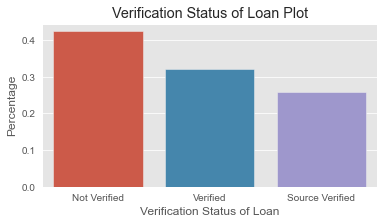

In [426]:
plt.figure(figsize=(6,3))

### Percentage for Y axis
percent_df = masterdf['verification_status'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='verification_status', data=percent_df)
plt.xlabel('Verification Status of Loan')
plt.ylabel('Percentage')
plt.title('Verification Status of Loan Plot')
plt.show()

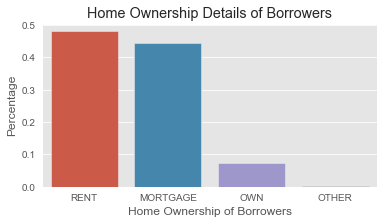

In [427]:
plt.figure(figsize=(6,3))

### Percentage for Y axis
percent_df = masterdf['home_ownership'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='home_ownership', data=percent_df)
plt.xlabel('Home Ownership of Borrowers')
plt.ylabel('Percentage')
plt.title('Home Ownership Details of Borrowers')
plt.show()

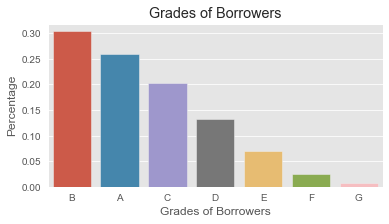

In [428]:
plt.figure(figsize=(6,3))

### Percentage for Y axis
percent_df = masterdf['grade'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='grade', data=percent_df)
plt.xlabel('Grades of Borrowers')
plt.ylabel('Percentage')
plt.title('Grades of Borrowers')
plt.show()

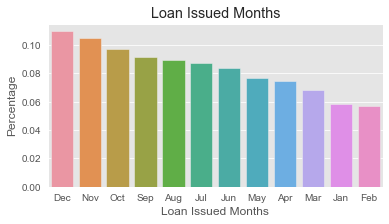

In [429]:

plt.figure(figsize=(6,3))

### Percentage for Y axis
percent_df = masterdf['issue_d_month'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='issue_d_month', data=percent_df)
plt.xlabel('Loan Issued Months')
plt.ylabel('Percentage')
plt.title('Loan Issued Months')
plt.show()

In [430]:

masterdf.loan_amnt.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9])

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
10%       3200.000000
20%       5000.000000
30%       6000.000000
40%       8000.000000
50%      10000.000000
60%      11500.000000
70%      14000.000000
90%      22000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

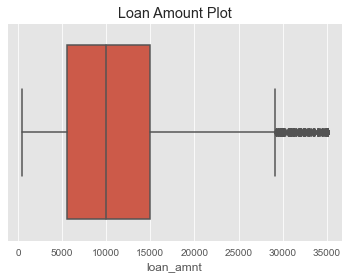

In [431]:
sns.boxplot(masterdf.loan_amnt)
plt.title('Loan Amount Plot')
plt.show()

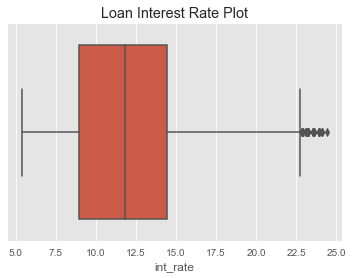

In [432]:
sns.boxplot(masterdf.int_rate)
plt.title('Loan Interest Rate Plot')
plt.show()

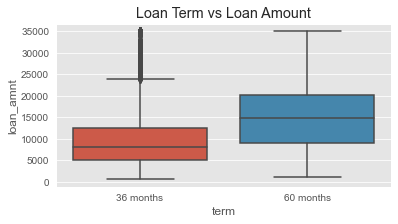

In [433]:
plt.figure(figsize=(6,3))

sns.boxplot(x='term', y=masterdf.loan_amnt, data=masterdf)
plt.title('Loan Term vs Loan Amount')
plt.show()


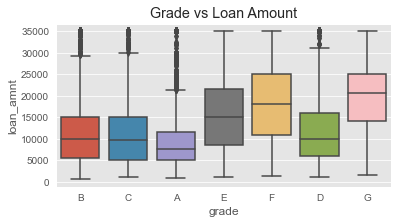

In [434]:
plt.figure(figsize=(6,3))

sns.boxplot(x='grade', y=masterdf.loan_amnt, data=masterdf)
plt.title('Grade vs Loan Amount')
plt.show()



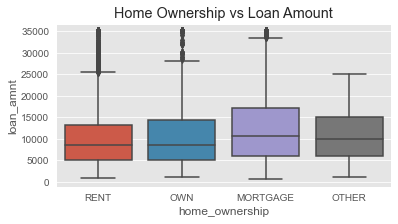

In [435]:
plt.figure(figsize=(6,3))

sns.boxplot(x='home_ownership', y=masterdf.loan_amnt, data=masterdf)
plt.title('Home Ownership vs Loan Amount')
plt.show()

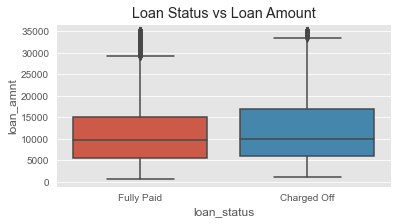

In [436]:
plt.figure(figsize=(6,3))
sns.boxplot(x='loan_status', y=masterdf.loan_amnt, data=masterdf)
plt.title('Loan Status vs Loan Amount')
plt.show()

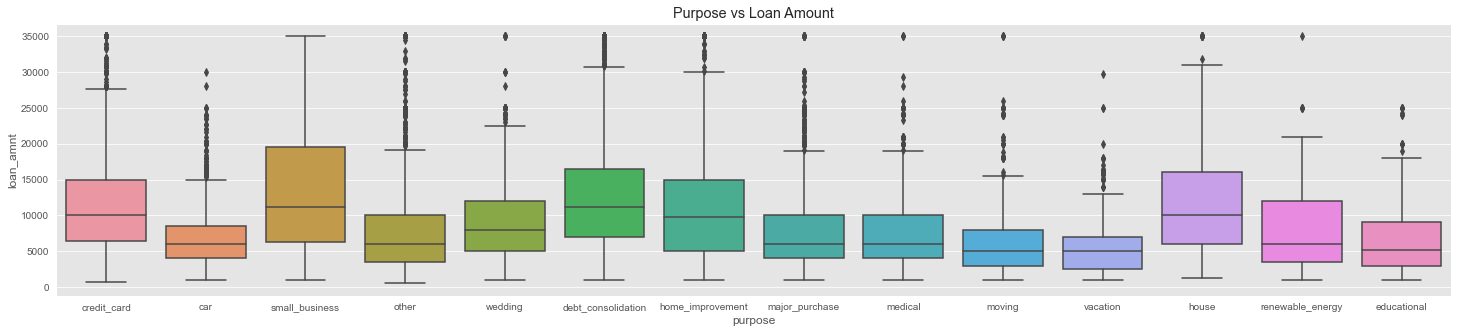

In [437]:
plt.figure(figsize=(25,5))
sns.boxplot(x='purpose', y=masterdf.loan_amnt, data=masterdf)
plt.title('Purpose vs Loan Amount')
plt.show()

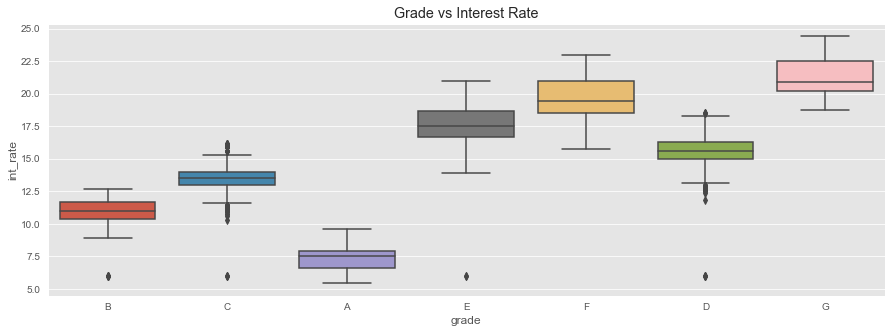

In [438]:
plt.figure(figsize=(15,5))
sns.boxplot(x='grade', y=masterdf.int_rate, data=masterdf)
plt.title('Grade vs Interest Rate')
plt.show()

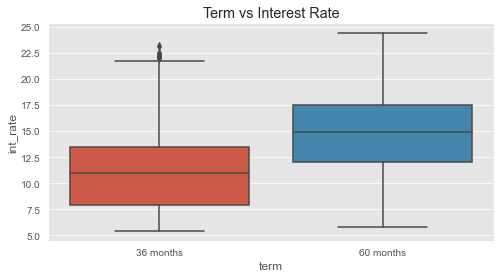

In [439]:
plt.figure(figsize=(8,4))
sns.boxplot(x='term', y=masterdf.int_rate, data=masterdf)
plt.title('Term vs Interest Rate')
plt.show()

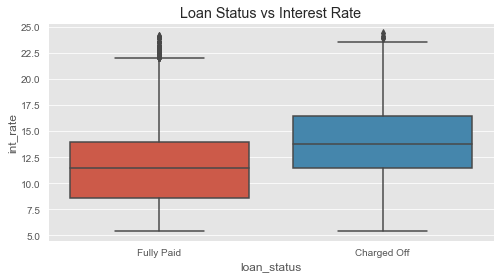

In [440]:
plt.figure(figsize=(8,4))
sns.boxplot(x='loan_status', y=masterdf.int_rate, data=masterdf)
plt.title('Loan Status vs Interest Rate')
plt.show()

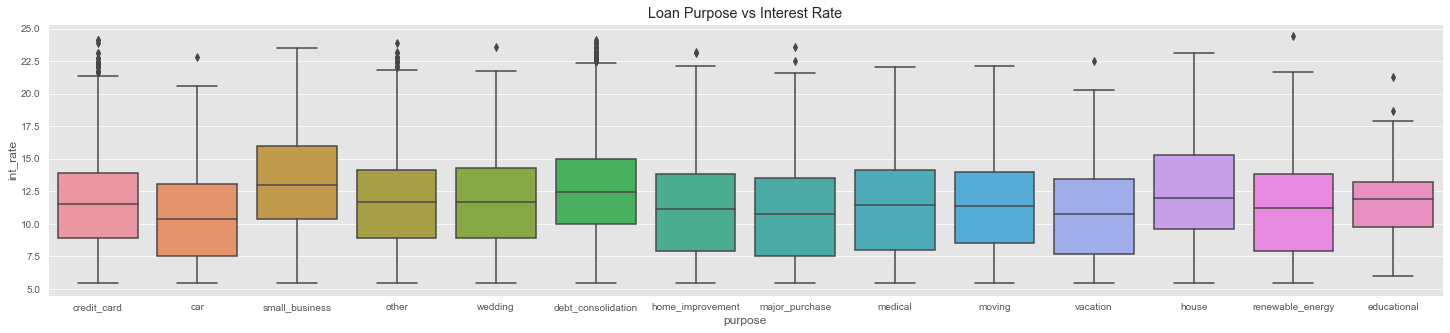

In [441]:
plt.figure(figsize=(25,5))
sns.boxplot(x='purpose', y=masterdf.int_rate, data=masterdf)
plt.title('Loan Purpose vs Interest Rate')
plt.show()

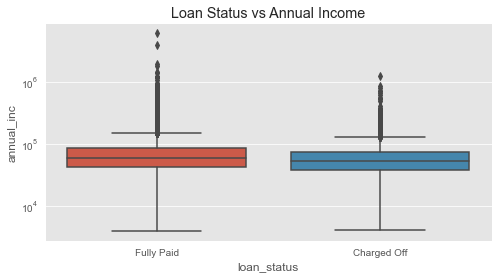

In [442]:
plt.figure(figsize=(8,4))
sns.boxplot(x='loan_status', y=masterdf.annual_inc, data=masterdf)
plt.title('Loan Status vs Annual Income')
plt.yscale('log')
plt.show()

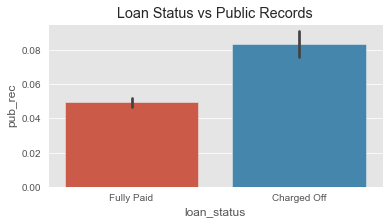

In [443]:
plt.figure(figsize=(6,3))
sns.barplot(data=masterdf, x="loan_status", y="pub_rec")
plt.title('Loan Status vs Public Records')
plt.show()

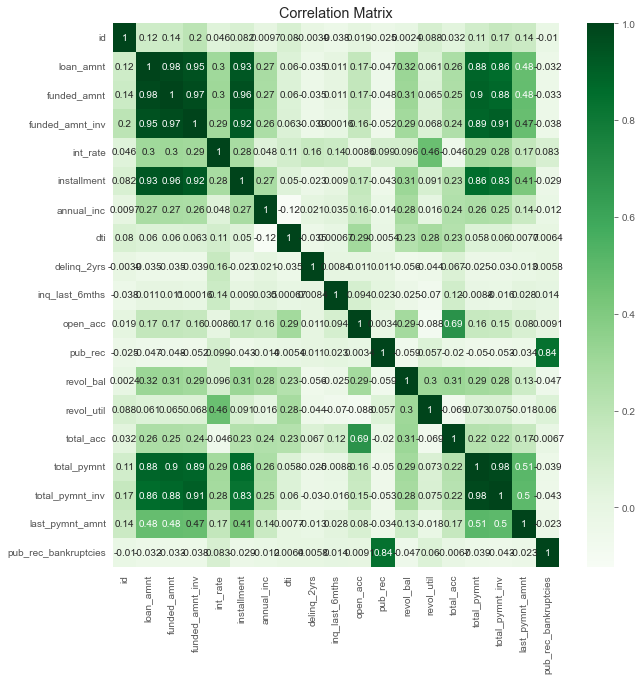

In [444]:
###  ("Correlation Matrix")
corr_matrix = masterdf.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_matrix, annot = True, cmap='Greens')
plt.title("Correlation Matrix")
plt.show()

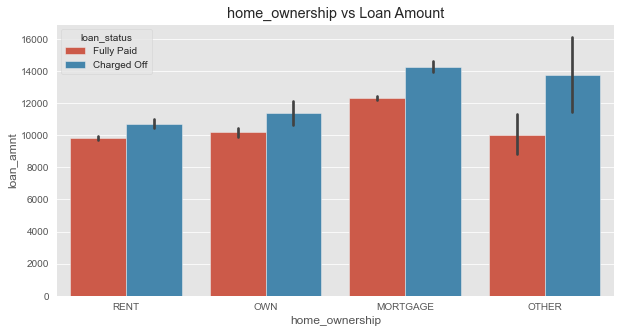

In [445]:
plt.figure(figsize=(10,5))
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data= masterdf)
plt.title('home_ownership vs Loan Amount')
plt.show()

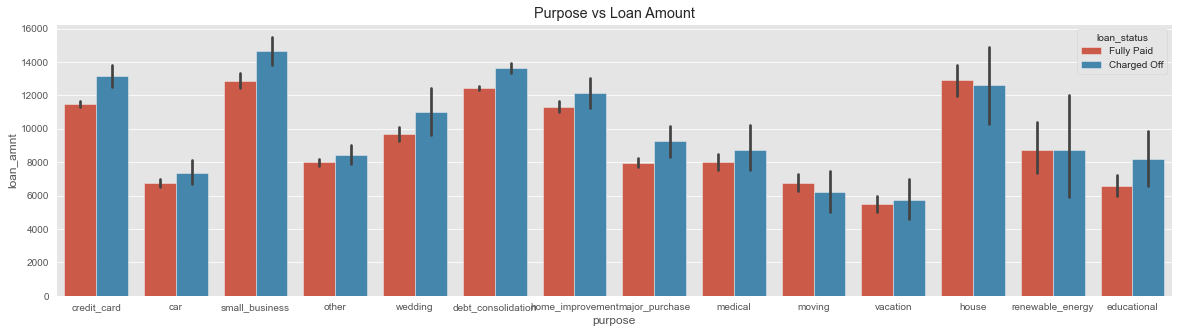

In [446]:
plt.figure(figsize=(20,5))
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= masterdf)
plt.title('Purpose vs Loan Amount')
plt.show()

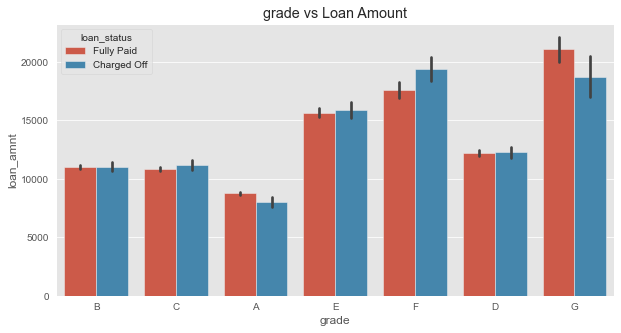

In [447]:
plt.figure(figsize=(10,5))
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data= masterdf)
plt.title('grade vs Loan Amount')
plt.show()

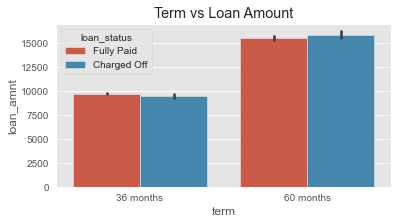

In [448]:
plt.figure(figsize=(6,3))
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data= masterdf)
plt.title('Term vs Loan Amount')
plt.show()